## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI? </b>
5. ### <b> Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor. </b>
6. ### <b>Top 3 directors prefer which actors the most? </b>



# Data Exploration

In [1]:
#Import package
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module-1 Python for Data Science/imdb_data.csv')

In [4]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
print(df.loc[0,'crew'])

[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451

In [7]:
crew_list = eval(df.loc[0,'crew'])

In [8]:
len(crew_list)

72

In [9]:
type(eval(df.loc[0,'genres'])) # The type of this

list

In [10]:
def finding_actor(x):
  x = eval(x)
  list_ =[]
  for i in x:
    name = i['name']
    list_.append(name)
  return list_

In [11]:
df['cast'].fillna('[]').apply(lambda x : finding_actor(x))

0       [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1       [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2       [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3       [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4       [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
                              ...                        
2995    [Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...
2996    [Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...
2997    [Geena Davis, Samuel L. Jackson, Yvonne Zima, ...
2998    [Ben Stiller, Jennifer Aniston, Philip Seymour...
2999    [Taylor Lautner, Lily Collins, Alfred Molina, ...
Name: cast, Length: 3000, dtype: object

In [12]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

##<u>1. Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</u>

In [13]:
important_cols = ['budget', 'genres', 'imdb_id', 'original_language','original_title','cast','crew','revenue']

In [14]:
df = df[important_cols]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   budget             3000 non-null   int64 
 1   genres             2993 non-null   object
 2   imdb_id            3000 non-null   object
 3   original_language  3000 non-null   object
 4   original_title     3000 non-null   object
 5   cast               2987 non-null   object
 6   crew               2984 non-null   object
 7   revenue            3000 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 187.6+ KB


In [16]:
# drop the null records

df.dropna(inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2978 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   budget             2978 non-null   int64 
 1   genres             2978 non-null   object
 2   imdb_id            2978 non-null   object
 3   original_language  2978 non-null   object
 4   original_title     2978 non-null   object
 5   cast               2978 non-null   object
 6   crew               2978 non-null   object
 7   revenue            2978 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 209.4+ KB


In [18]:
df.shape

(2978, 8)

In [19]:
df['actor'] = df['cast'].apply(lambda x : finding_actor(x))

In [20]:
def finding_producer(x):
  x = eval(x)
  list_ =[]
  role = 'Producer'
  for i in x:
    if role == i['job']:
      name = i['name']
      list_.append(name)
  return list_

In [21]:
print(df['crew'][0])

[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451

In [22]:
df['producer'] = df['crew'].apply(lambda x : finding_producer(x))

In [23]:
# do this for director
def finding_director(x):
  x = eval(x)
  list_ =[]
  role = 'Director'
  for i in x:
    if role == i['job']:
      name = i['name']
      list_.append(name)
  return list_


In [24]:
df['director'] = df['crew'].apply(lambda x : finding_director(x))


In [25]:
df.columns

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'cast', 'crew', 'revenue', 'actor', 'producer', 'director'],
      dtype='object')

In [26]:
df.head()

,budget,genres,imdb_id,original_language,original_title,cast,crew,revenue,actor,producer,director
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Andrew Panay],[Steve Pink]
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall]
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle]
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],[Sujoy Ghosh]
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[],[Jong-seok Yoon]


In [27]:
df['profit'] = df['revenue'] - df['budget']

## <u>1. Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</u>

In [28]:
df_new = df.copy()

In [29]:
def fun(df,col_name):
  df[col_name] = 1
  return df

In [30]:
fun(df,'A')

,budget,genres,imdb_id,original_language,original_title,cast,crew,revenue,actor,producer,director,profit,A
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Andrew Panay],[Steve Pink],-1685349,1
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],55149435,1
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle],9792000,1
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],[Sujoy Ghosh],14800000,1
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[],[Jong-seok Yoon],3923970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...",[James G. Robinson],[Dennis Hopper],1596687,1
2996,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",tt2364975,sv,Vi är bäst!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...",[Lars J√∂nsson],[Lukas Moodysson],180590,1
2997,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",tt0116908,en,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...","[Stephanie Austin, Shane Black, Renny Harlin, ...",[Renny Harlin],24456761,1
2998,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0343135,en,Along Came Polly,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,"[Ben Stiller, Jennifer Aniston, Philip Seymour...","[Danny DeVito, Michael Shamberg, Stacey Sher]",[John Hamburg],129963386,1


In [31]:
df_new

,budget,genres,imdb_id,original_language,original_title,cast,crew,revenue,actor,producer,director,profit
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",[Andrew Panay],[Steve Pink],-1685349
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],55149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[David Lancaster, Michel Litvak, Jason Blum, H...",[Damien Chazelle],9792000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",[Sujoy Ghosh],[Sujoy Ghosh],14800000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,마린보이,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",[],[Jong-seok Yoon],3923970
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0109403,en,Chasers,"[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,"[Tom Berenger, William McNamara, –≠—Ä–∏–∫–∞ –≠...",[James G. Robinson],[Dennis Hopper],1596687
2996,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",tt2364975,sv,Vi är bäst!,"[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,"[Mira Barkhammar, Mira Grosin, Liv LeMoyne, Da...",[Lars J√∂nsson],[Lukas Moodysson],180590
2997,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",tt0116908,en,The Long Kiss Goodnight,"[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,"[Geena Davis, Samuel L. Jackson, Yvonne Zima, ...","[Stephanie Austin, Shane Black, Renny Harlin, ...",[Renny Harlin],24456761
2998,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",tt0343135,en,Along Came Polly,"[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,"[Ben Stiller, Jennifer Aniston, Philip Seymour...","[Danny DeVito, Michael Shamberg, Stacey Sher]",[John Hamburg],129963386


In [32]:
df_new.describe()

,budget,revenue,profit
count,2.978000e+03,2.978000e+03,2.978000e+03
mean,2.229256e+07,6.570459e+07,4.341204e+07
std,3.655376e+07,1.350115e+08,1.103017e+08
min,0.000000e+00,1.000000e+00,-9.289603e+07
25%,0.000000e+00,2.402165e+06,1.866650e+04
50%,8.000000e+06,1.680707e+07,6.141358e+06
75%,2.800000e+07,6.866567e+07,4.123187e+07
max,3.800000e+08,1.519558e+09,1.316249e+09


In [33]:
# replace the exteme low values with the median of that particular columns
df_new.loc[df_new['budget']<1000, 'budget'] = df_new.loc[df_new['budget']>=1000,'budget'].median()
df_new.loc[df_new['revenue']<1000, 'revenue'] = df_new.loc[df_new['revenue']>=1000,'revenue'].median()

In [34]:
df_new.describe()

,budget,revenue,profit
count,2.978000e+03,2.978000e+03,2.978000e+03
mean,2.672506e+07,6.603292e+07,4.341204e+07
std,3.449315e+07,1.348725e+08,1.103017e+08
min,2.500000e+03,1.404000e+03,-9.289603e+07
25%,1.000000e+07,2.984246e+06,1.866650e+04
50%,1.600000e+07,1.745985e+07,6.141358e+06
75%,2.800000e+07,6.866567e+07,4.123187e+07
max,3.800000e+08,1.519558e+09,1.316249e+09


In [35]:
df_new = df_new.drop('profit', axis= 1, ) # I am dropping the profit column because i made that col before doing EDA in revenue and budget col

In [36]:
df_new.columns

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'cast', 'crew', 'revenue', 'actor', 'producer', 'director'],
      dtype='object')

In [37]:
# again make the profit col. and the profit  = (revenue - budget)
df_new['profit'] = df_new['revenue'] - df_new['budget']

In [38]:
df_new.describe()

,budget,revenue,profit
count,2.978000e+03,2.978000e+03,2.978000e+03
mean,2.672506e+07,6.603292e+07,3.930786e+07
std,3.449315e+07,1.348725e+08,1.116469e+08
min,2.500000e+03,1.404000e+03,-9.289603e+07
25%,1.000000e+07,2.984246e+06,-9.829154e+06
50%,1.600000e+07,1.745985e+07,2.514158e+06
75%,2.800000e+07,6.866567e+07,3.865149e+07
max,3.800000e+08,1.519558e+09,1.316249e+09


In [39]:
# maximum profit
max_profit = df_new['profit'].max()

In [40]:
max_profit_movie_df = df_new[df_new['profit']==max_profit]

In [41]:
max_profit_movie_df['actor']

1761    [Vin Diesel, Paul Walker, Dwayne Johnson, Mich...
Name: actor, dtype: object

In [42]:
max_profit_movie_df['director']

1761    [James Wan]
Name: director, dtype: object

In [43]:
max_profit_movie_df['producer']

1761    [Vin Diesel, Neal H. Moritz, Michael Fottrell,...
Name: producer, dtype: object

## Extracting the actor, director, producer, original_title and profit cols to get the ans. of 1 question

In [44]:
max_profit_movie_df[['actor','director','producer','profit','original_title']].reset_index(drop = True)

,actor,director,producer,profit,original_title
0,"[Vin Diesel, Paul Walker, Dwayne Johnson, Mich...",[James Wan],"[Vin Diesel, Neal H. Moritz, Michael Fottrell,...",1316249360,Furious 7


## <u>2. This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?</u>

In [45]:
# for this we have to work on original_language column
# ROI (rate of interest) =(profit/ budge)*100

In [46]:
# df_new.head()
df_new['roi'] = (df_new['profit']/df_new['budget'])*100

In [47]:
# apply the groupby method on top of original language col
roi_language_df = df_new.groupby('original_language').agg({'roi':'mean'})

In [48]:
max_ave_roi = roi_language_df['roi'].max()

# We solved the Problem no. 2 and the maximum average roi is 11278 and respective original language is ko. and as you can see in bar graph as well.

In [49]:
roi_language_df[roi_language_df['roi'] == max_ave_roi]

,roi
original_language,
ko,11278.797018


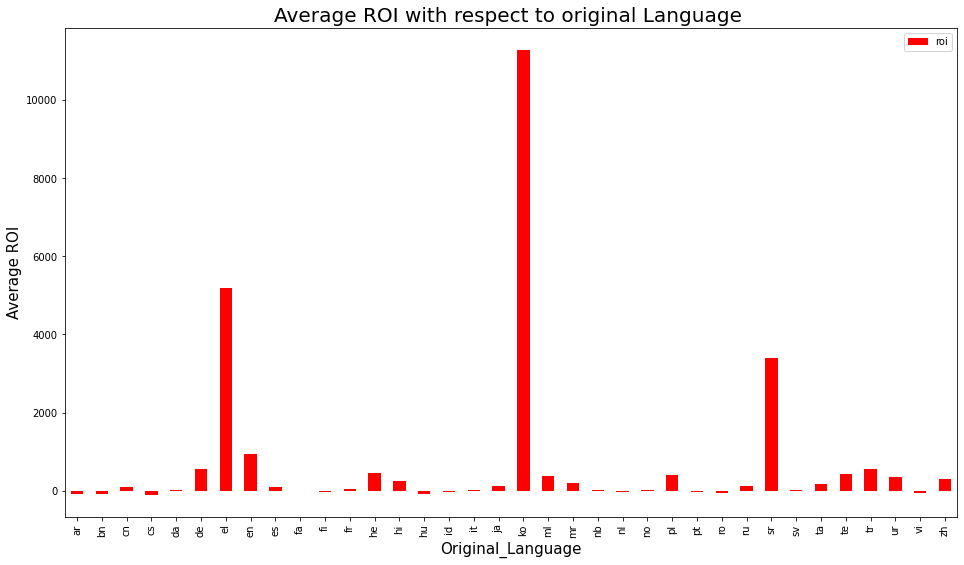

In [50]:
ax = roi_language_df.plot(kind = 'bar',color="red", figsize = (16,9))
ax.set_xlabel("Original_Language", fontsize = 15)
ax.set_ylabel("Average ROI", fontsize = 15)
ax.set_title("Average ROI with respect to original Language ", fontsize = 20);

##<u>3. Find out the unique genres of movies in this dataset.</u>

In [51]:
type(df_new['genres'][0])

str

In [52]:
df_new['genres'][0] # we have to take the name key and store the value of that key in a var

"[{'id': 35, 'name': 'Comedy'}]"

In [53]:
# make a function that can take a record and convert that into list of dict.

def finding_geners(x):
  list_ = []
  x = eval(x)
  for i in x:
    name = i['name']
    list_.append(name)

  return list_  

In [54]:
# we need to again evaluate this. i will have to convert it into list of dictionary
df_new['genres'][0]

"[{'id': 35, 'name': 'Comedy'}]"

In [55]:
df_new['new_geners'] = df_new['genres'].apply(lambda x : finding_geners(x))

In [56]:
df_new_ = df_new.copy()
df_new = df_new.explode('new_geners').reset_index()

In [57]:
df_new['new_geners'].unique()

array(['Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action',
       'Animation', 'Adventure', 'Horror', 'Documentary', 'Music',
       'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War',
       'Western', 'History', 'TV Movie'], dtype=object)

These are the Uniques geners that we have in this dataset : 
# 'Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action',
##       'Animation', 'Adventure', 'Horror', 'Documentary', 'Music',
#       'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War',
##       'Western', 'History', 'TV Movie'

##<u>4 .Make a table of all the producers and directors of each movie. Find the top 3 producers who have produced movies with the highest average RoI?</u>

In [58]:
roi_language_df.sort_values(by = 'roi',ascending =  False)

,roi
original_language,
ko,11278.797018
el,5198.013245
sr,3391.969400
en,935.719623
tr,567.125469
de,547.213654
he,456.292450
te,440.076812
pl,395.816987


In [59]:
df_new.columns

Index(['index', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'cast', 'crew', 'revenue', 'actor', 'producer',
       'director', 'profit', 'roi', 'new_geners'],
      dtype='object')

In [60]:
table_of_dir_n_produer = df_new[['producer','director','original_title']]

In [61]:
table_of_dir_n_produer

,producer,director,original_title
0,[Andrew Panay],[Steve Pink],Hot Tub Time Machine 2
1,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],The Princess Diaries 2: Royal Engagement
2,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],The Princess Diaries 2: Royal Engagement
3,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],The Princess Diaries 2: Royal Engagement
4,"[Whitney Houston, Mario Iscovich, Debra Martin...",[Garry Marshall],The Princess Diaries 2: Royal Engagement
...,...,...,...
7464,"[Danny DeVito, Michael Shamberg, Stacey Sher]",[John Hamburg],Along Came Polly
7465,"[Danny DeVito, Michael Shamberg, Stacey Sher]",[John Hamburg],Along Came Polly
7466,"[Doug Davison, Roy Lee, Ellen Goldsmith-Vein, ...",[John Singleton],Abduction
7467,"[Doug Davison, Roy Lee, Ellen Goldsmith-Vein, ...",[John Singleton],Abduction


In [62]:
df_new['new_geners']

0         Comedy
1         Comedy
2          Drama
3         Family
4        Romance
          ...   
7464      Comedy
7465     Romance
7466    Thriller
7467      Action
7468     Mystery
Name: new_geners, Length: 7469, dtype: object

In [63]:
df_new = df_new.explode('producer').reset_index()

In [64]:
df_new['producer']

0                Andrew Panay
1             Whitney Houston
2              Mario Iscovich
3          Debra Martin Chase
4             Whitney Houston
                 ...         
16956            Doug Davison
16957                 Roy Lee
16958    Ellen Goldsmith-Vein
16959             Dan Lautner
16960            Lee Stollman
Name: producer, Length: 16961, dtype: object

In [65]:
df_new.columns

Index(['level_0', 'index', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'cast', 'crew', 'revenue', 'actor', 'producer',
       'director', 'profit', 'roi', 'new_geners'],
      dtype='object')

In [66]:
df_new['roi'].sort_values(ascending = False)

7048     1.288939e+06
7052     1.288939e+06
7047     1.288939e+06
7049     1.288939e+06
7050     1.288939e+06
             ...     
14911   -9.998561e+01
14910   -9.998561e+01
14908   -9.998561e+01
2329    -9.999082e+01
2328    -9.999082e+01
Name: roi, Length: 16961, dtype: float64

In [67]:
df_new['director']

0            [Steve Pink]
1        [Garry Marshall]
2        [Garry Marshall]
3        [Garry Marshall]
4        [Garry Marshall]
               ...       
16956    [John Singleton]
16957    [John Singleton]
16958    [John Singleton]
16959    [John Singleton]
16960    [John Singleton]
Name: director, Length: 16961, dtype: object

In [68]:
df_new = df_new.explode('director')

In [69]:
df_new['director']

0            Steve Pink
1        Garry Marshall
2        Garry Marshall
3        Garry Marshall
4        Garry Marshall
              ...      
16956    John Singleton
16957    John Singleton
16958    John Singleton
16959    John Singleton
16960    John Singleton
Name: director, Length: 18452, dtype: object

In [70]:
df_roi_dr = df_new.groupby(['director','producer'])['roi'].mean().sort_values(ascending = False).head(3)

In [71]:

df_roi_dr.reset_index()

,director,producer,roi
0,Oren Peli,Jason Blum,1.288939e+06
1,Oren Peli,Oren Peli,1.288939e+06
2,Oren Peli,Amir Zbeda,1.288939e+06


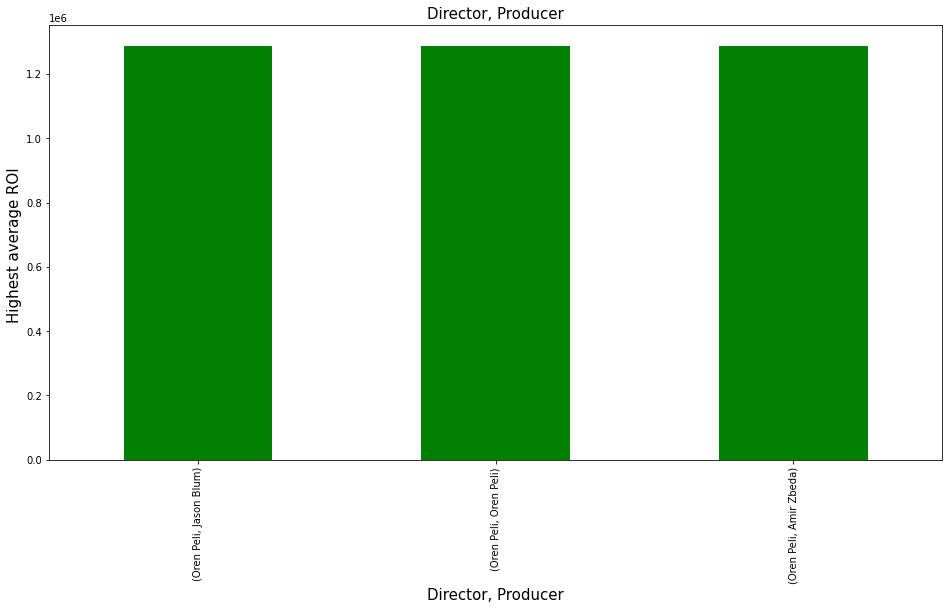

In [72]:
ax = df_roi_dr.plot(kind= "bar",figsize = (16,8), color = "green");
ax.set_xlabel("Director, Producer",fontsize = 15)
ax.set_ylabel("Highest average ROI ",fontsize = 15)
ax.set_title("Director, Producer",fontsize = 15);

##<u>5. Which actor has acted in the most number of movies? Deep dive into the movies, genres and profits corresponding to this actor.</u>

In [73]:
df_1 = df_new.copy()

In [74]:
df_new.columns

Index(['level_0', 'index', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'cast', 'crew', 'revenue', 'actor', 'producer',
       'director', 'profit', 'roi', 'new_geners'],
      dtype='object')

In [75]:
df_new.drop('level_0',axis = 1,inplace = True)

In [76]:
df_new = df_new.reset_index()

In [77]:
df_new.drop('index',axis=1,inplace = True)

In [78]:
df_new = df_new.reset_index(drop = True)

In [79]:
df_new.drop('level_0',axis=1,inplace = True)

In [80]:
df_new

,budget,genres,imdb_id,original_language,original_title,cast,crew,revenue,actor,producer,director,profit,roi,new_geners
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",Andrew Panay,Steve Pink,-1685349,-12.038207,Comedy
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Whitney Houston,Garry Marshall,55149435,137.873588,Comedy
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Mario Iscovich,Garry Marshall,55149435,137.873588,Comedy
3,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Debra Martin Chase,Garry Marshall,55149435,137.873588,Comedy
4,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Whitney Houston,Garry Marshall,55149435,137.873588,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18447,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Doug Davison,John Singleton,47087155,134.534729,Mystery
18448,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Roy Lee,John Singleton,47087155,134.534729,Mystery
18449,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Ellen Goldsmith-Vein,John Singleton,47087155,134.534729,Mystery
18450,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Dan Lautner,John Singleton,47087155,134.534729,Mystery


In [81]:
df_new['actor'].value_counts(ascending = False)

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Eric Jacobus, Julian Barratt, Ian Virgo, Miguel √Ångel Mu√±oz, Dana Meinrath, Richard Hardisty, Sherry Lara, Francisco Barreiro, Julija Steponaitytƒó, Michael Isokpan, Ehigiator Joy Nosa, Patrick Daniel, Lauren Molina, Michael Dragon Vincent, Aki Morita, Bryan Connolly, Jordan D. Morris, Jess Lane, Andr√© Hennicke, Victoria Broom, Alan McKenna, Tristan Risk, James McDougall, Mark Grossman, Jason Edmiston, Jano Badovinac, B√©atrice Dalle, Tess Maury, Sakurako Mizuki, Delphine Roussel, Nicholas Amer]    240
[Adam Wingard, Lawrence Michael Levine, Kelsy Abbott, Hannah Hughes, L.C. Holt, Hannah Al Rashid, Fachry Albar, Oka Antara, Devon Brookshire, Samantha Gracie, Kevin Hunt, Epy Kusnandar, Carly Robell, Mindy Robinson, Jay Saunders, Jeremie Saunders, Andrew Suleiman, John T. Woods]                                                                                                                                                                                                                 

In [94]:
df_new['actor'].value_counts()

Bruce Willis         262
Julian Barratt       248
Patrick Daniel       248
Alan McKenna         243
Samuel L. Jackson    243
                    ... 
Beverly Polcyn         1
Riley Smith            1
Nathan West            1
Michelle Holgate       1
Riton Liebman          1
Name: actor, Length: 38570, dtype: int64

### Bruce Willis has made the max movies which is  262 movies, for getting mode infotmation about lets apply the groupby method

In [83]:
df_new

,budget,genres,imdb_id,original_language,original_title,cast,crew,revenue,actor,producer,director,profit,roi,new_geners
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",Andrew Panay,Steve Pink,-1685349,-12.038207,Comedy
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Whitney Houston,Garry Marshall,55149435,137.873588,Comedy
2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Mario Iscovich,Garry Marshall,55149435,137.873588,Comedy
3,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Debra Martin Chase,Garry Marshall,55149435,137.873588,Comedy
4,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",Whitney Houston,Garry Marshall,55149435,137.873588,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18447,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Doug Davison,John Singleton,47087155,134.534729,Mystery
18448,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Roy Lee,John Singleton,47087155,134.534729,Mystery
18449,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Ellen Goldsmith-Vein,John Singleton,47087155,134.534729,Mystery
18450,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",tt1600195,en,Abduction,"[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,"[Taylor Lautner, Lily Collins, Alfred Molina, ...",Dan Lautner,John Singleton,47087155,134.534729,Mystery


Deep dive into the movies, genres and profits corresponding to this actor.

In [84]:
df_new.columns

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'cast', 'crew', 'revenue', 'actor', 'producer', 'director', 'profit',
       'roi', 'new_geners'],
      dtype='object')

In [85]:
df_new = df_new.explode('actor').reset_index(drop = True)

In [89]:
df_n = df_new[df_new['actor'] == 'Bruce Willis']

In [90]:
df_n.columns

Index(['budget', 'genres', 'imdb_id', 'original_language', 'original_title',
       'cast', 'crew', 'revenue', 'actor', 'producer', 'director', 'profit',
       'roi', 'new_geners'],
      dtype='object')

In [93]:
df_n.groupby(['new_geners','original_title']).agg({'profit':'sum'}).reset_index()

,new_geners,original_title,profit
0,Action,Bandits,-51576679
1,Action,Cop Out,76751412
2,Action,Extraction,-63932900
3,Action,Hudson Hawk,-191127680
4,Action,Last Man Standing,-39465998
...,...,...,...
69,Thriller,The Fifth Element,173920180
70,Thriller,The Jackal,397321120
71,Thriller,The Siege,93345824
72,Thriller,The Whole Ten Yards,-55376876


##<u>6. Top 3 directors prefer which actors the most?</u>

In [109]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows",None)

df_actor_dir = df_new.groupby(['director','actor']).agg({'original_title':'count'}).sort_values(by = 'original_title',ascending = False).head(3)

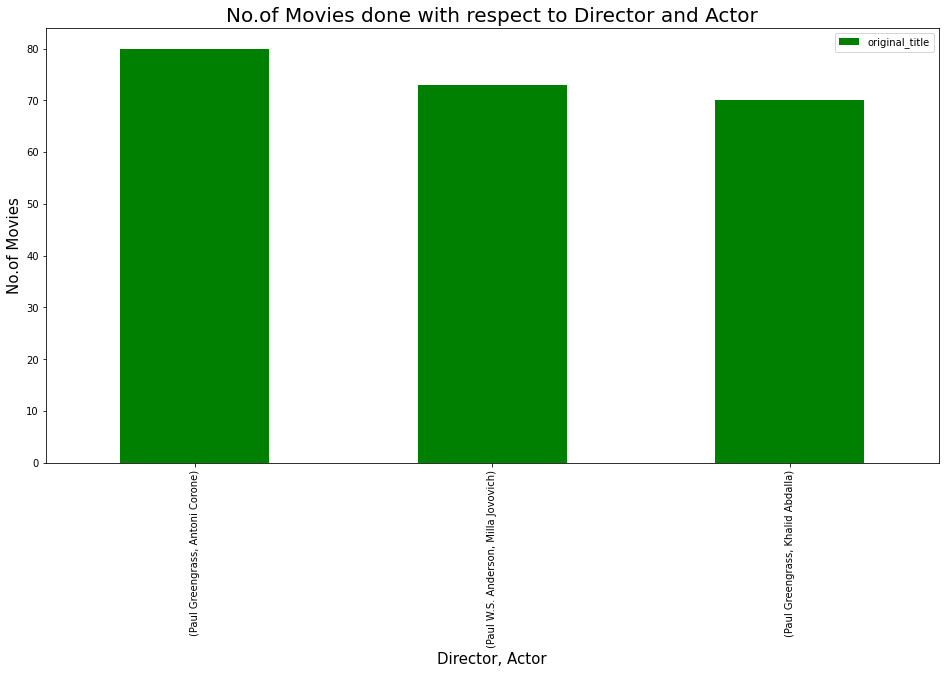

In [114]:
ax = df_actor_dir.plot(kind = "bar", figsize = (16,8),color = "green")
ax.set_xlabel("Director, Actor",fontsize = 15)
ax.set_ylabel("No.of Movies",fontsize = 15)
ax.set_title("No.of Movies done with respect to Director and Actor",fontsize = 20);

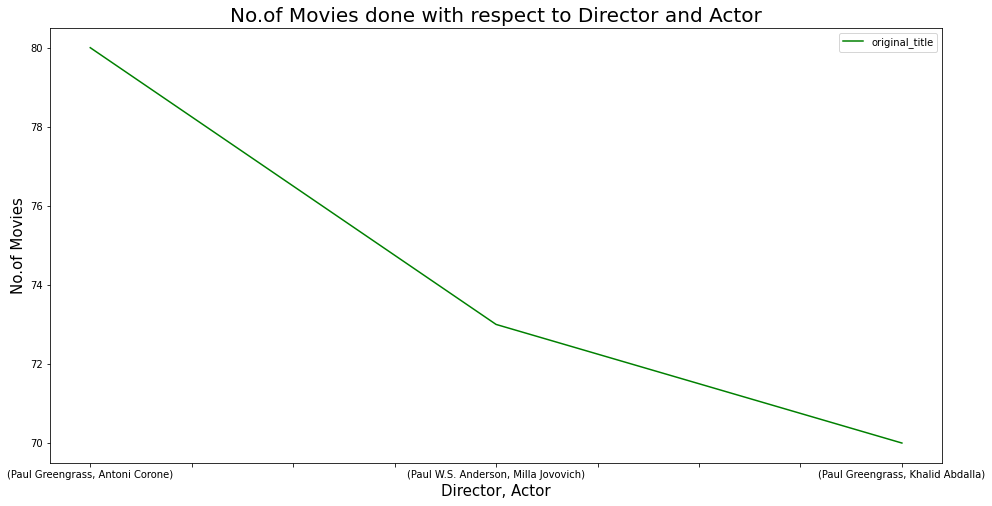

In [115]:
# we can also plot line plot as  well
# lets see.
ax = df_actor_dir.plot(figsize = (16,8),color = "green")
ax.set_xlabel("Director, Actor",fontsize = 15)
ax.set_ylabel("No.of Movies",fontsize = 15)
ax.set_title("No.of Movies done with respect to Director and Actor",fontsize = 20);

